Download the dataset from here: https://urbansounddataset.weebly.com/download-urbansound8k.html

#### Audio Classification Data Preprocessing

In [54]:
!pip install librosa
!pip install resampy

In [3]:
%pwd

'C:\\Users\\ASUS'

In [6]:
## change it to your appropriate directory
%cd "D:\colab ananya\Audio Prediction\UrbanSound8K"  

D:\colab ananya\Audio Prediction\UrbanSound8K


In [7]:
### read a sample audio using librosa
import librosa
audio_file_path='./audio/fold1/7383-3-0-1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [8]:
print(librosa_audio_data)

[ 0.01675954  0.02307146  0.01842667 ... -0.00196145 -0.00163956
 -0.00171084]


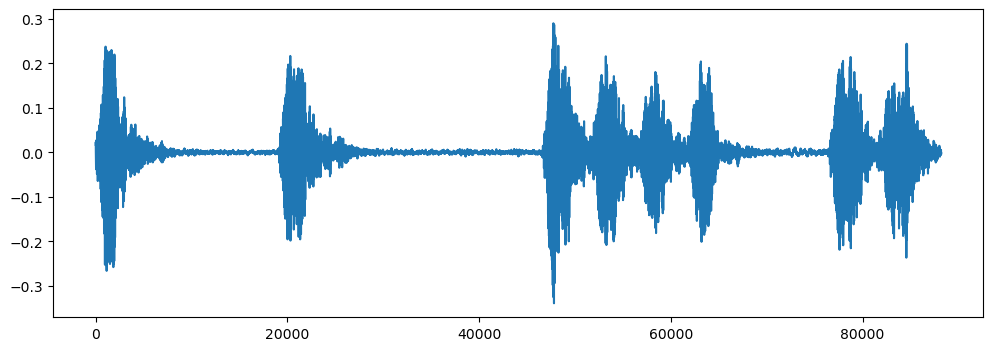

In [9]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [10]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [11]:
wave_audio

array([[ 233, 1268],
       [ 188, 1253],
       [ 161, 1235],
       ...,
       [-403,  291],
       [-414,  313],
       [-435,  326]], dtype=int16)

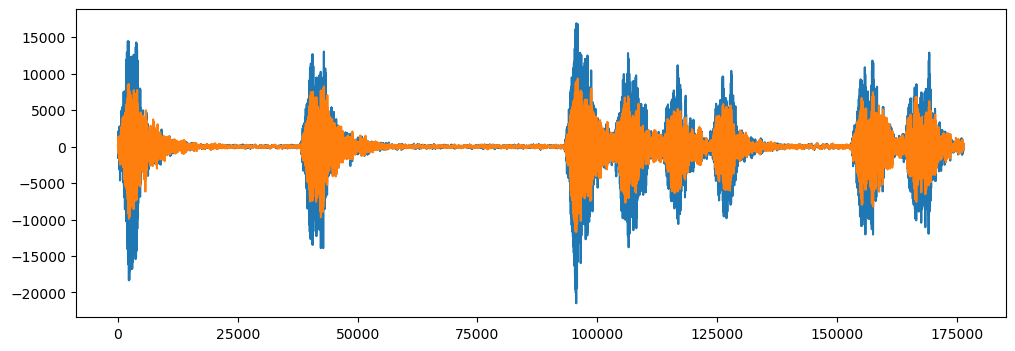

In [12]:
import matplotlib.pyplot as plt

# Original audio with 2 channels - a stereo channel
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [56]:
metadata = pd.read_csv('./metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [57]:
# Check whether the dataset is imbalanced
metadata['class'].value_counts()  # not imbalanced

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [13]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [14]:
mfccs

array([[-3.2162250e+02, -2.5684540e+02, -2.4672139e+02, ...,
        -4.0194836e+02, -4.0807272e+02, -4.3510498e+02],
       [ 1.6920758e+02,  1.6716632e+02,  1.5238861e+02, ...,
         1.6923880e+02,  1.5861362e+02,  1.5013846e+02],
       [ 5.1523433e+00, -2.2868052e+01, -3.6243896e+01, ...,
         1.5111917e+01,  9.5673237e+00,  1.3778051e+01],
       ...,
       [ 1.9863869e+00,  4.9657464e+00,  3.5146582e+00, ...,
        -3.5684700e+00, -4.9427052e+00, -3.3226390e+00],
       [-4.9984705e-01, -2.0277491e+00,  2.2127564e+00, ...,
        -8.1701696e-01, -5.7675523e-01, -8.9787447e-01],
       [-1.6297232e+00,  2.9203063e-01,  3.8473570e+00, ...,
        -1.1408356e+00, -4.4268936e-01,  2.8325527e+00]], dtype=float32)

In [15]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='./audio/'
metadata=pd.read_csv('./metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [16]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [17]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [07:41, 11.92it/s]C:\Users\ASUS\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [15:27, 13.17it/s]C:\Users\ASUS\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [16:04,  9.05it/s]


In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [19]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [20]:
X.shape

(8732, 40)

In [21]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [22]:
### Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, 
                                               test_size=0.2, 
                                               random_state=0)

In [25]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745247e+00, -1.55697179e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939811e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181704e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651175e+00]], dtype=float32)

In [26]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
X_train.shape

(6985, 40)

In [28]:
X_test.shape

(1747, 40)

In [29]:
y_train.shape

(6985, 10)

In [30]:
y_test.shape

(1747, 10)

### Model Creation

In [31]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
### No of classes
num_labels=y.shape[1]

In [34]:
model=Sequential()

### first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [36]:
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam')

In [39]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs, 
          validation_data=(X_test, y_test), 
          callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/2
215/219 [============================>.] - ETA: 0s - loss: 0.8659 - accuracy: 0.7134
Epoch 1: val_loss improved from inf to 0.68790, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 0.8684 - accuracy: 0.7125 - val_loss: 0.6879 - val_accuracy: 0.7951
Epoch 2/2
207/219 [===========================>..] - ETA: 0s - loss: 0.8543 - accuracy: 0.7148
Epoch 2: val_loss improved from 0.68790 to 0.67607, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 7ms/step - loss: 0.8562 - accuracy: 0.7152 - val_loss: 0.6761 - val_accuracy: 0.7934
Training completed in time:  0:00:03.575707


In [40]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7933600544929504


In [44]:
filename = "./audio/fold8/7390-9-0-3.wav"
prediction_feature = features_extractor(filename)
prediction_feature

array([-315.6028    ,   94.854805  ,  -37.22234   ,   46.778263  ,
         -6.728693  ,   10.012548  ,   -1.6075529 ,   18.51134   ,
        -11.9006195 ,    7.5940356 ,   -7.8546596 ,   11.362425  ,
        -15.617317  ,    3.3019907 ,  -11.958162  ,    6.353489  ,
         -5.5870256 ,   20.78539   ,   -0.4692282 ,    6.0436325 ,
        -11.619548  ,    2.8686748 ,  -10.176432  ,    8.332485  ,
          1.776561  ,    2.5638974 ,  -14.761059  ,    1.1465563 ,
          3.7835658 ,    3.1094651 ,  -12.185813  ,   -3.0522912 ,
          3.728414  ,    8.962752  ,    0.9306449 ,    3.18008   ,
          2.485049  ,    0.61386466,  -11.449189  ,   -6.0105853 ],
      dtype=float32)

In [45]:
prediction_feature.shape

(40,)

In [42]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.604805  ,
         -7.5685983 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564744 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.5334608 ,  -23.843391  ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.58320105,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [46]:
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)
predicted_classes

55/55 [==============================] - 0s 3ms/step


array([5, 4, 4, ..., 1, 9, 2], dtype=int64)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [52]:
filename="./engine_idling.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_label = predicted_label.argmax(axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.9271866e+02  9.7850571e+01 -1.8676361e+01  8.7613802e+00
 -1.1093277e+01  1.0193600e+01 -4.4330163e+00  2.2431835e+01
 -7.6917207e-01  3.0379185e+01 -9.4156561e+00  2.8325850e+01
 -1.1865625e+01  1.3343688e+01 -1.9347321e+00  1.3118441e+01
 -2.6087332e+00  1.3897337e+01 -4.3420386e+00  1.2448536e+01
 -1.6831083e+00  1.0618814e+01 -2.2682900e+00  3.5653982e+00
  5.8185600e-02  8.1975832e+00 -2.8900387e+00  4.2824726e+00
 -5.0060420e+00  3.8060112e+00 -1.1410917e+00  6.5060711e+00
 -1.1260734e+00  3.9362342e+00 -2.1410000e+00  5.9001034e-01
 -4.4409757e+00 -1.0626882e-01  7.4065882e-01  3.5789919e+00]
[[-1.9271866e+02  9.7850571e+01 -1.8676361e+01  8.7613802e+00
  -1.1093277e+01  1.0193600e+01 -4.4330163e+00  2.2431835e+01
  -7.6917207e-01  3.0379185e+01 -9.4156561e+00  2.8325850e+01
  -1.1865625e+01  1.3343688e+01 -1.9347321e+00  1.3118441e+01
  -2.6087332e+00  1.3897337e+01 -4.3420386e+00  1.2448536e+01
  -1.6831083e+00  1.0618814e+01 -2.2682900e+00  3.5653982e+00
   5.8185600e-02 

array(['engine_idling'], dtype='<U16')

In [53]:
filename="./street_music.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_label = predicted_label.argmax(axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.7646889e+02  1.8407663e+02 -2.0293650e+01  1.4173634e+01
 -1.3667880e+01  2.1785286e+01  3.0285356e+00  7.0670252e+00
 -1.1146075e+01  1.1307280e+01  4.8395798e-01 -3.0703700e+00
 -4.0661492e+00  8.4998083e+00 -1.1961178e+01 -1.8539536e+00
 -3.6917071e+00  4.7325122e-01 -1.1059358e+01  2.8940358e+00
 -9.0084486e+00 -1.5700381e-01 -8.0262651e+00 -1.7564348e+00
 -3.2101917e+00  2.9332626e+00  2.8414166e+00 -9.0575927e-01
  1.5774386e+00 -9.7200054e-01 -4.3558574e+00 -2.3154848e+00
 -2.2664862e+00 -3.5359378e+00 -3.9190271e-01  1.9498048e+00
 -3.6175051e-01  8.7783284e-02  1.0697675e+00 -1.8020840e+00]
[[-1.7646889e+02  1.8407663e+02 -2.0293650e+01  1.4173634e+01
  -1.3667880e+01  2.1785286e+01  3.0285356e+00  7.0670252e+00
  -1.1146075e+01  1.1307280e+01  4.8395798e-01 -3.0703700e+00
  -4.0661492e+00  8.4998083e+00 -1.1961178e+01 -1.8539536e+00
  -3.6917071e+00  4.7325122e-01 -1.1059358e+01  2.8940358e+00
  -9.0084486e+00 -1.5700381e-01 -8.0262651e+00 -1.7564348e+00
  -3.2101917e+00 

array(['street_music'], dtype='<U16')